## Tic-Tac-Toe Agent
​
In Below, We will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries

In [47]:
from TCGame_Env_atul import TicTacToe
import collections
import numpy as np
import random
import pickle
import collections
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
## defining object for the Tictac toe environment created as MDP in TCGame_env
env = TicTacToe()

In [48]:


def Q_state_new(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [49]:


def valid_actions_New(state):

    valid_Actions_New = []
    
    valid_Actions_New = [i for i in env.action_space(state)[0]]
    return valid_Actions_New

In [50]:
# Define a function which will add new Q-values to the Q-dictionary. 
def add_to_dict_new(state):
    state1 = Q_state_new(state)
    
    valid_act1 = valid_actions_New(state)
    if state1 not in Q_dict.keys():
        for action in valid_act1:
            Q_dict[state1][action]=0

In [51]:
# printing the default tic tac toe board positions
Q_state_new(env.state)

'x-x-x-x-x-x-x-x-x'

In [52]:
# Print all the valid actions
valid_actions_New(env.state)


[(0, 1),
 (0, 3),
 (0, 5),
 (0, 7),
 (0, 9),
 (1, 1),
 (1, 3),
 (1, 5),
 (1, 7),
 (1, 9),
 (2, 1),
 (2, 3),
 (2, 5),
 (2, 7),
 (2, 9),
 (3, 1),
 (3, 3),
 (3, 5),
 (3, 7),
 (3, 9),
 (4, 1),
 (4, 3),
 (4, 5),
 (4, 7),
 (4, 9),
 (5, 1),
 (5, 3),
 (5, 5),
 (5, 7),
 (5, 9),
 (6, 1),
 (6, 3),
 (6, 5),
 (6, 7),
 (6, 9),
 (7, 1),
 (7, 3),
 (7, 5),
 (7, 7),
 (7, 9),
 (8, 1),
 (8, 3),
 (8, 5),
 (8, 7),
 (8, 9)]

#### Epsilon-greedy strategy

In [53]:
# Defining epsilon-greedy policy. 
def epsilon_greedy_new(state, time):
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*time)
    z = np.random.random()
        
    if z > epsilon:
        state1 = Q_state_new(state)
        action = max(Q_dict[state1],key=Q_dict[state1].get)   #Exploitation: this gets the action corresponding to max q-value of current state
    else:
        possible_action = [i for i in env.action_space(state)[0]]        
        action = possible_action[np.random.choice(range(len(possible_action)))]    #Exploration: randomly choosing and action
    
    return action

#### Track the state-action pairs for checking convergence

In [54]:
# Initialise Q_dictionary and States_track
Q_dict = collections.defaultdict(dict)
States_track =collections.defaultdict(dict)

In [55]:
def initialise_tracking_states_new():
    Sample_Qvalues_New = [('x-x-x-x-x-x-x-x-x',(6,5)),('x-x-x-x-x-x-x-x-x',(1,9)),
                       ('x-3-x-x-1-x-x-x-x',(7,5)),('x-5-x-x-x-x-5-7-x',(8,2))]    #select some 4 Q-values
    for q_values in Sample_Qvalues_New:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = []

In [56]:
def save_obj_new(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [57]:
# definign a function for saving states tracking

def save_tracking_states_new():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action]) 

#### Define hyperparameters

In [58]:
#Define parameters for the training

EPISODES = 50000
LR = 0.01                   # learning rate
GAMMA = 0.9                # discount factor

max_epsilon = 1.0
min_epsilon = 0.001
decay_rate = 0.001        # epsilon decay rate
threshold = 200       # no of episodes after which states_tracked wwill be saved
policy_threshold = 300   # no of episodes after which Q dictionary/table will be saved

In [59]:
initialise_tracking_states_new()

## Building  agent that learns the game by Q-Learning

In [60]:
import time 
start_time1 = time.time()

for episode in range(EPISODES):
    env = TicTacToe() # Environment
    curr_state = env.state    
    done = False  
    add_to_dict_new(curr_state)  # add the current state to dictionary

    while done != True:  
        curr_state1 = Q_state_new(curr_state)
        curr_action = epsilon_greedy_new(curr_state, episode)   # applying epislon method
        next_state, reward, done = env.step(curr_state, curr_action) # getting rewar
        next_state_temp = Q_state_new(next_state)
        add_to_dict_new(next_state)


        

        # Rules Updated 
        if done != True:
            max_next = max(Q_dict[next_state_temp],key=Q_dict[next_state_temp].get)  
                #this gets the action corresponding to max q-value of next state
            Q_dict[curr_state1][curr_action] += LR * ((reward + (GAMMA*(Q_dict[next_state_temp][max_next])))
                                                      - Q_dict[curr_state1][curr_action] ) 
        else:
            Q_dict[curr_state1][curr_action] += LR * ((reward - Q_dict[curr_state1][curr_action]))

        # navigating to next state
        curr_state = next_state
        
     #states tracking   
    if ((episode+1)%threshold)==0:
        save_tracking_states_new()
        save_obj_new(States_track,'States_tracking_Atul')
#         print(episode) 

    if ((episode+1)% policy_threshold) == 0:  #every 300th episodes, the Q-dict will be saved
        save_obj_new(Q_dict,'Policy_Q_dict_Atul')  
        

elapsed_time = time.time() - start_time1
save_obj_new(States_track,'States_tracking_Atul')   
save_obj_new(Q_dict,'Policy_Q_dict_Atul')

In [61]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -1.006727677825884,
              (0, 3): -1.0067377849539636,
              (0, 5): -1.0067204692209046,
              (0, 7): -1.006723780425488,
              (0, 9): -1.006732905291425,
              (1, 1): -1.0067313798231763,
              (1, 3): -1.0067303129443148,
              (1, 5): -1.0067216343164982,
              (1, 7): -1.006734719571075,
              (1, 9): -1.0067251978645593,
              (2, 1): -1.0067898047265842,
              (2, 3): -1.0067370881818287,
              (2, 5): -1.0067390852779923,
              (2, 7): -1.0067387135550616,
              (2, 9): -1.0067308523733107,
              (3, 1): -1.0067199830592484,
              (3, 3): -1.0067346773984762,
              (3, 5): -1.006728643265696,
              (3, 7): -1.0067401226352701,
              (3, 9): -1.0067249578963038,
              (4, 1): -1.0067417734649644,
              (4, 3): -1.0067395507388541,
              (4, 5)

### Check whether Q-values learnt by the agent have converged or not

<function matplotlib.pyplot.show(*args, **kw)>

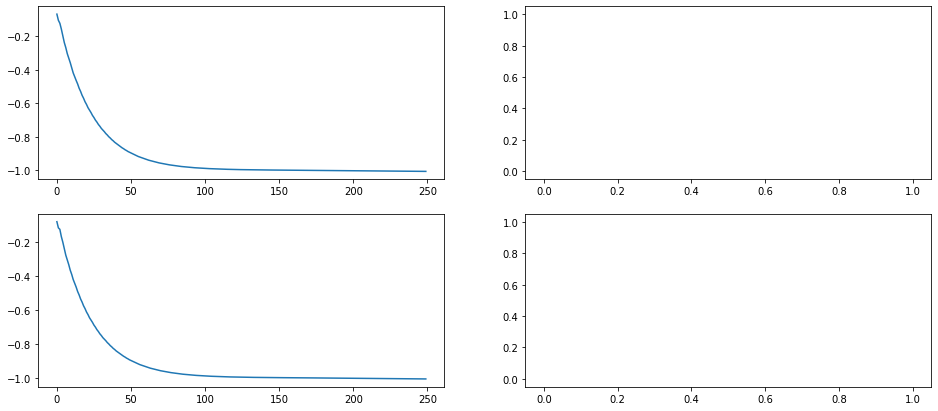

In [62]:
plt.figure(0, figsize=(16,7))

x_axis_graph = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(6,5)])))
plt.subplot(221)
plt.plot(x_axis_graph,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(6,5)]))
plt.show

x_axis_graph = np.asarray(range(0, len(States_track['x-3-x-x-1-x-x-x-x'][(7,5)])))
plt.subplot(222)
plt.plot(x_axis_graph,np.asarray(States_track['x-3-x-x-1-x-x-x-x'][(7,5)]))
plt.show

x_axis_graph = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(1,9)])))
plt.subplot(223)
plt.plot(x_axis_graph,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(1,9)]))
plt.show

x_axis_graph = np.asarray(range(0, len(States_track['x-5-x-x-x-x-5-7-x'][(8,2)])))
plt.subplot(224)
plt.plot(x_axis_graph,np.asarray(States_track['x-5-x-x-x-x-5-7-x'][(8,2)]))
plt.show




### Epsilon - decay check

In [63]:
time1 = np.arange(0,50000)
epsilon = []
for i in range(0,50000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

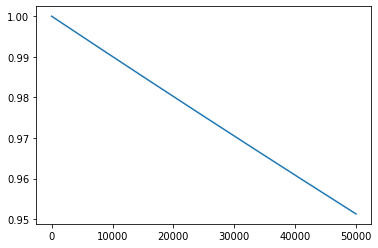

In [64]:
plt.plot(time1, epsilon)
plt.show()